In [1]:
from sympy import *

In [2]:
import numpy as np

In [3]:
from sympy import init_printing
init_printing()

## Finding roots of Polynomial

In [4]:
x = Symbol('x')

In [5]:
f = Function('f')

### Obtaining roots - using solve

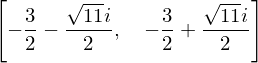

In [6]:
solve(x**2+3*x+5) # solving directly by `solve` method

### Obtaining roots - using Functions

In [7]:
f = x**2+42*x+65

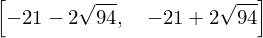

In [8]:
solve(f, x) # solving the polynomial using 

## Homogenous Orinary Differential Equation

In [9]:
f = Function('f')  # redefining the function

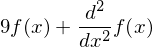

In [10]:
Derivative(f(x), x, x) + 9*f(x)

In [11]:
dsolve(Derivative(f(x), x, 2) + 9*f(x), f(x))

#### Check that the function $y(x) = x^3 - 2x + 4$ is a solution to the differential equation, $\frac{d^2y}{dx^2}-6x=0$

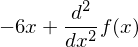

In [12]:
Derivative(f(x),x,2)-6*x

In [13]:
dsolve(Derivative(f(x),x,2)-6*x)

Substuting in the original equation. if it's = 0, then the given polynomial is the solution for the differential equation

In [14]:
diff(x**3-2*x+4,x,2)-6*x 

# Growth Model

In [15]:
import matplotlib.pyplot as plt

In [16]:
year = list(range(1790,2000,10))
pop = [379,423,472,523,610,738,995,1231,1457,1783,2239,2805,3366,3852,4250,4317,4691,5149,5689,5737,6016]

In [17]:
len(year)

### Linear
$$\frac{dP}{dt} = r \; \text{(Linear Growth)}$$

In [18]:
t = Symbol('t')
r = Symbol('r')
P = Function('P')

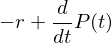

In [19]:
Derivative(P(t), t, 1)-r

In [20]:
dsolve(Derivative(P(t), t, 1)-r)

@ t = 0, pop=  379 => $C_1 = 379$ 

In [85]:
linear_model = [4.4*t+379 for t in range(0,210,10)]

In [22]:
plt.style.use('seaborn-ticks')

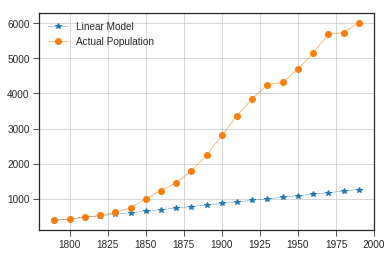

In [86]:
plt.plot(year, linear_model, '*--', linewidth=0.5, label="Linear Model")
plt.plot(year, pop, 'o-', linewidth=0.5, label="Actual Population")
plt.legend(loc="best")
plt.grid(True)

### Exponential

$$\frac{dP}{dt} = rP \; \text{(Exponential Growth)}$$

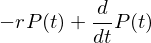

In [24]:
Derivative(P(t), t, 1)-r*P(t)

In [25]:
dsolve(Derivative(P(t), t, 1)-r*P(t))

$C_1 = 379 \; \text{when} \; t=0 \; \text{therefore} \; r=0.01098359$

In [83]:
exp_model = [379*np.exp(0.01098359*t) for t in range(0,210,10)]

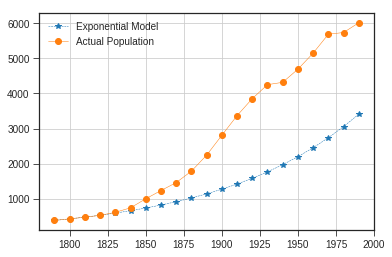

In [84]:
plt.plot(year, exp_model, '*--', linewidth=0.5, label="Exponential Model")
plt.plot(year, pop, 'o-', linewidth=0.5, label="Actual Population")
plt.legend(loc="best")
plt.grid(True)

### Logistic

$$ \frac{dP}{dt} = rP \bigg( 1 - \frac{P}{K} \bigg)$$

In [28]:
K = Symbol('K')
P = Function('P')

In [29]:
type(P)

sympy.core.function.UndefinedFunction

In [30]:
type(t)

sympy.core.symbol.Symbol

In [31]:
gs = dsolve(Eq(Derivative(P(t),t,1),(r*P(t)*(1-P(t)/K))))

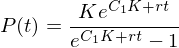

In [32]:
gs

In [33]:
general_solution = gs.rhs

In [34]:
particular_soln_at_t_0 = general_solution.subs({t:0})

In [35]:
C1, p_0 = symbols('C1 p_0')

In [36]:
solutions = solve(Eq(particular_soln_at_t_0, p_0), C1)

In [37]:
value_of_C1_at_t_0 = solutions[0]

In [38]:
particular = gs.subs(C1, value_of_C1_at_t_0)

In [39]:
particular = simplify(particular)

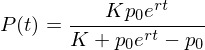

In [40]:
particular

In [41]:
particular.subs(t, 0)

Find the value of $C_1$ that makes $P(t=0) = P_0$

Pop = 379 @ t = 0 <br/>
K = 7000<br/>
r = 0.01165

In [43]:
logistic_model = particular.subs({K:7000})

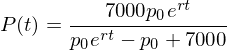

In [44]:
logistic_model

In [45]:
logistic_model = logistic_model.subs({r:0.01165})

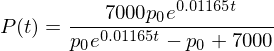

In [46]:
logistic_model

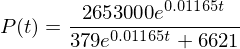

In [55]:
logistic_model.subs({p_0:379})

In [67]:
type((logistic_model.subs({t:1, p_0:379}).rhs))

sympy.core.numbers.Float

In [68]:
logistic_population = [(logistic_model.subs({t:i, p_0:379})).rhs for i in range(0,210,10)]

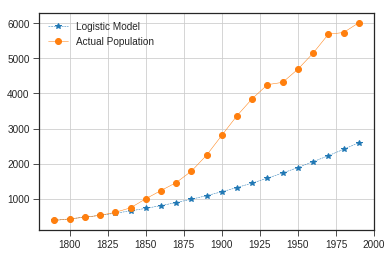

In [70]:
plt.plot(year, logistic_population, '*--', linewidth=0.5, label="Logistic Model")
plt.plot(year, pop, 'o-', linewidth=0.5, label="Actual Population")
plt.legend(loc="best")
plt.grid(True)

# Subplots

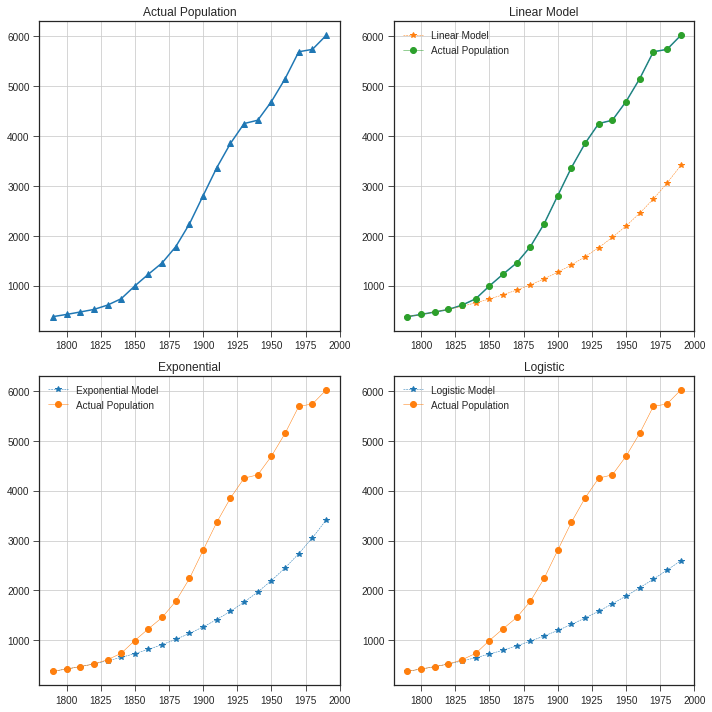

In [88]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(year, pop, '^-')
plt.yscale('linear')
plt.title('Actual Population')
plt.grid(True)


# linear
plt.subplot(222)
plt.plot(year, pop)
plt.plot(year, model, '*--', linewidth=0.5, label="Linear Model")
plt.plot(year, pop, 'o-', linewidth=0.5, label="Actual Population")
plt.legend(loc="best")
plt.title('Linear Model')
plt.grid(True)


# exponential
plt.subplot(223)
plt.plot(year, model, '*--', linewidth=0.5, label="Exponential Model")
plt.plot(year, pop, 'o-', linewidth=0.5, label="Actual Population")
plt.legend(loc="best")
plt.title("Exponential")
plt.grid(True)

# logistic
plt.subplot(224)
plt.grid(True)
plt.plot(year, logistic_population, '*--', linewidth=0.5, label="Logistic Model")
plt.plot(year, pop, 'o-', linewidth=0.5, label="Actual Population")
plt.legend(loc="best")
plt.title("Logistic")
plt.grid(True)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
# plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.tight_layout()
plt.show()